# Анализ бизнес-показателей развлекательного приложения.

## Введение

В ходе выполнения данного проекта будет проведен анализ развлекательного приложения Procrastinate Pro+.
Цель данного проекта - проведение анализа рекламных компаний с целью выявления причин их неэфективности и убытков в течение последних нескольких месяцев, что требуется для обеспечения прибыльности компании и ее эффективного развития.

Для проведения анализа были предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- данные сервера о их посещениях,
- информация о их покупках за этот период,
- рекламные расходы.

В ходе проведения исследовательского анализа планируется определить:
- типы устройств, используемые пользователями,
- источники привлечения новых пользователей,
- регион их локации.

В ходе проведения анализа маркетинговых показателей Планируется определить:
- общая сумма расходов на маркетинг.
- распределение трат по источникам. 
- средняя стоимость привлечения одного пользователя (CAC) из каждого источника.
- суммарная стоимость покупок каждого клиента.

В ходе проведения оценки окупаемости рекламы планируется проведение анализа окупаемости рекламы с разбивкой по устройствам, по странам, по рекламным каналам. Кроме того будет проведен анализ конверсии пользователей и их удержания.

В заключении данного проекта планируется сведение всех выявленных закономерностей, что позволит сформулировать рекомендации, которые позволят улучшить сложившуюся ситуацию с экономическим положением работы приложения Procrastinate Pro+.

## Загрузка данных и их подготовка к проведению анализа.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Загрузим предоставленные для анализа данные. Датафрейм `visits` содержит данные о визитах пользователей, датафрейм `orders` - о заказах, датафрейм `costs` - о расходах пользователей. 

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Рассмотрим более подробно датафрейм `visits`.

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков данных не выявлено, но необходимо привести наименование столбцов к стандартному виду без пробелов и прописных букв.

Кроме того, столбцы session_start и session_end имеют неверный тип данных. Приведем его к типу данных datetime.

In [5]:
visits.columns = ['user_id',
                 'region',
                 'device',
                 'channel',
                 'session_start',
                 'session_end']

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверим данный датафрейм на наличие явных дубликатов.

In [8]:
visits.duplicated().sum()

0

Явные дубликаты не выявлены.

Рассмотрим более подробно датафрейм `orders`.

In [9]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков данных не выявлено, но необходимо привести наименование столбцов к стандартному виду без пробелов и прописных букв.

Кроме того, столбец event_dt имеет неверный тип данных. Приведем его к типу данных datetime.

In [11]:
orders.columns = ['user_id',
                 'event_dt',
                 'revenue']

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим данный датафрейм на наличие явных дубликатов.

In [14]:
orders.duplicated().sum()

0

Явные дубликаты не выявлены.

Рассмотрим более подробно датафрейм `costs`.

In [15]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков данных не выявлено, но необходимо привести наименование столбцов к стандартному виду без пробелов и прописных букв.

Кроме того, столбец dt имеет неверный тип данных. Приведем его к типу данных datetime.

In [17]:
costs.columns = ['dt',
                 'channel',
                 'costs']

In [18]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим данный датафрейм на наличие явных дубликатов.

In [20]:
costs.duplicated().sum()

0

Явные дубликаты не выявлены.

**Промежуточный вывод**

Предоставленные данные были успешно загружены, все наименования столбцов были приведены к единому стандартному виду, все данные были приведены к требуемому для проведения исследований типу.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии, а также для постоения графиков.


- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV,
- `filter_data()` — для сглаживания данных,
- `plot_retention`  — для визуализации удержания пользователей,
- `plot_conversion`  — для визуализации конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [21]:
def get_profiles(sessions, orders, ad_costs):

# сортируем сессии по ID пользователя и дате привлечения
# группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
     # время первого посещения first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

# для когортного анализа определяем дату первого посещения
# и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

# считаем количество уникальных пользователей
# с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
     # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

# объединяем траты на рекламу и число привлечённых пользователей
# по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
   # ad_costs['dt'] = ad_costs['dt'].dt.date

# делим рекламные расходы на число привлечённых пользователей
# результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

# добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
)

# органические пользователи не связаны с данными о рекламе,
# поэтому в столбце acquisition_cost у них значения NaN
# заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles  # возвращаем профили с CAC

In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [23]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функции для построения графиков:

In [25]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [27]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Составим профили пользователей при помощи функции get_profiles. Данные профили в дальнейшем будут использоваться при проведении исследования.

In [29]:
profiles = get_profiles(visits, orders, costs)

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


 Определим минимальную и максимальную даты привлечения пользователей.

In [30]:
min_date = profiles['dt'].min()

min_date

datetime.date(2019, 5, 1)

In [31]:
max_date = profiles['dt'].max()

max_date

datetime.date(2019, 10, 27)

In [32]:
days_num = (max_date - min_date).days

days_num

179

Определим **из каких стран** пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны, а также построим гистогриммы по полученным данным.

In [33]:
country_payers = profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum']).reset_index()

country_payers.columns = ['region',
                         'n_users',
                         'pay_users']

country_payers = country_payers.sort_values(by='n_users').reset_index(drop=True)

country_payers

,region,n_users,pay_users
0,Germany,14981,616
1,France,17450,663
2,UK,17575,700
3,United States,100002,6902


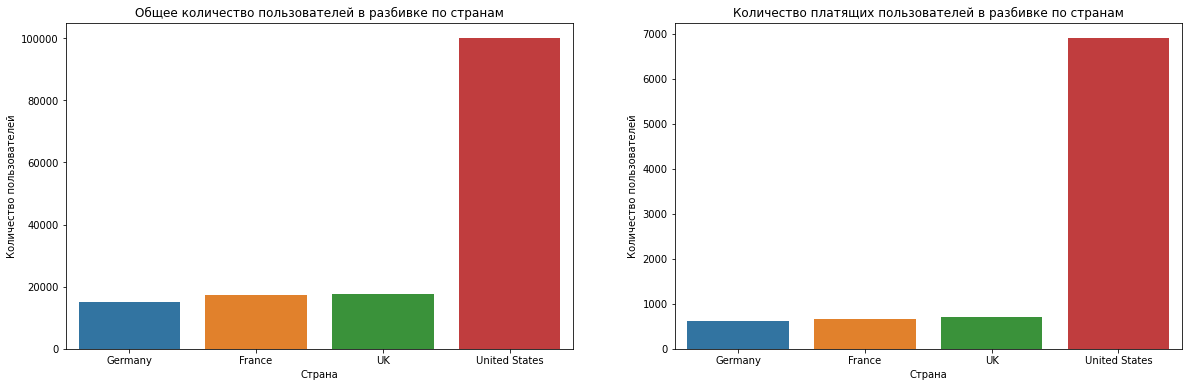

In [34]:
plt.figure(figsize=(20, 6))

country_payers_diagram = sns.barplot(x='region', y='n_users', data=country_payers, ax=plt.subplot(1,2,1))
country_payers_diagram.set_title('Общее количество пользователей в разбивке по странам')
country_payers_diagram.set_xlabel('Страна')
country_payers_diagram.set_ylabel('Количество пользователей')

country_payers_diagram = sns.barplot(x='region', y='pay_users', data=country_payers, ax=plt.subplot(1,2,2))
country_payers_diagram.set_title('Количество платящих пользователей в разбивке по странам')
country_payers_diagram.set_xlabel('Страна')
country_payers_diagram.set_ylabel('Количество пользователей')

plt.show()

In [35]:
for i in country_payers.index:
    
    result_i = country_payers.loc[i,'pay_users'] / country_payers.loc[i,'n_users']
    country_payers.loc[i, 'payers_part'] = '{:.2%}'.format(result_i)
    
country_payers

,region,n_users,pay_users,payers_part
0,Germany,14981,616,4.11%
1,France,17450,663,3.80%
2,UK,17575,700,3.98%
3,United States,100002,6902,6.90%


Согласно полученному расчету, наибольшее количество пользователей зарегистрированы в United States, кроме того, в данном регионе пользователи чаще всего переходят в статус "платящих" (6,9% от общего количества пользователей осуществляют покупки в приложении). Следовательно, данный рынок является наиболее интересным для продвижения продукта.

Наименее перспективный рынок - France. Там наблюдается как наименьшее количество пользователей, так и и наименьший процент перехода в категорию "платящих"(только 3,8% пользователей осуществляют покупки в приложении).

Определим **какими устройствами** пользуются клиенты и какие устройства предпочитают платящие пользователи. 
Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства, а также гистограммы показывающие это более наглядно.

In [36]:
device_payers = profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum']).reset_index()

device_payers.columns = ['device',
                        'n_users',
                        'pay_users']

device_payers = device_payers.sort_values(by='n_users').reset_index(drop=True) 

device_payers

,device,n_users,pay_users
0,Mac,30042,1912
1,PC,30455,1537
2,Android,35032,2050
3,iPhone,54479,3382


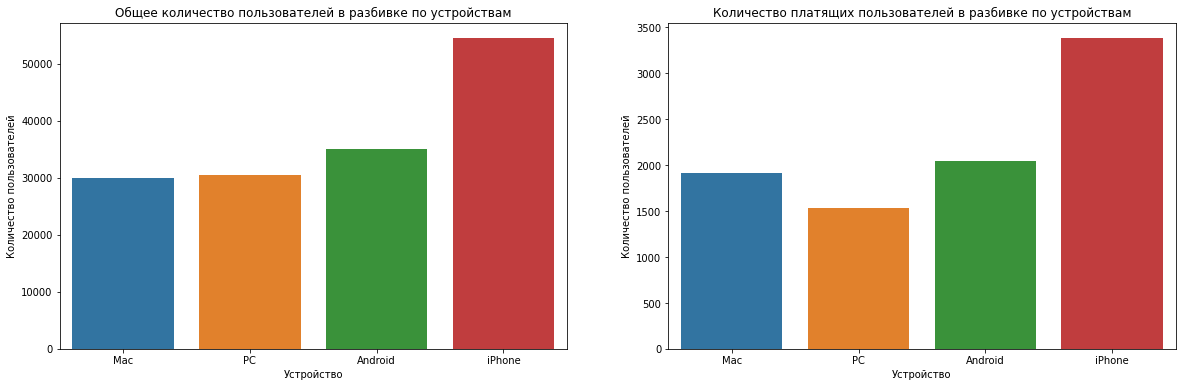

In [37]:
plt.figure(figsize=(20, 6))

device_payers_diagram = sns.barplot(x='device', y='n_users', data=device_payers, ax=plt.subplot(1,2,1))
device_payers_diagram.set_title('Общее количество пользователей в разбивке по устройствам')
device_payers_diagram.set_xlabel('Устройство')
device_payers_diagram.set_ylabel('Количество пользователей')

device_payers_diagram = sns.barplot(x='device', y='pay_users', data=device_payers, ax=plt.subplot(1,2,2))
device_payers_diagram.set_title('Количество платящих пользователей в разбивке по устройствам')
device_payers_diagram.set_xlabel('Устройство')
device_payers_diagram.set_ylabel('Количество пользователей')

plt.show()

In [38]:
for i in device_payers.index:
    
    result_i = device_payers.loc[i,'pay_users'] / device_payers.loc[i,'n_users']
    device_payers.loc[i, 'payers_part'] = '{:.2%}'.format(result_i)
    
device_payers

,device,n_users,pay_users,payers_part
0,Mac,30042,1912,6.36%
1,PC,30455,1537,5.05%
2,Android,35032,2050,5.85%
3,iPhone,54479,3382,6.21%


Согласно полученному расчету, приложение наиболее популярно для пользователей мобильных устройств. Наибольшее количество пользователей пользуются iPhone (6,2% из них совершают покупки). Для пользователей Android данное приложение значительно менее популярно, хотя переход в категорию платящих происходит практически на том же уровне (5,8% пользователей совершают покупки). 

Проложение одинаково популярно для пользователей Mac и PC, практически равное количество пользователей, использующих данные устройства, пришли за заданный период. Но в данной категории наиболее заметна разница в переходе в статус платящих пользователей. Так 6,3% пользователей Mac совершают покупки в приложении, в то время как только 5% пользователей РС делают это.

Таким образом, исследуемое приложение более пополярно среди пользователей техники Apple, возможно, оно является более удобным и безотказным для этих устройств. В связи с этим, необходимо отметить, что продвижение приложение наиболее переспективно для пользователей iPhone и Мас.

Изучим **рекламные источники** привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения, а также отобразим данную информацию графически в форме гистограммы.

In [39]:
channel_payers = profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum']).reset_index()

channel_payers.columns = ['channel',
                        'n_users',
                        'pay_users']

channel_payers = channel_payers.sort_values(by='n_users').reset_index(drop=True) 

channel_payers

,channel,n_users,pay_users
0,lambdaMediaAds,2149,225
1,AdNonSense,3880,440
2,YRabbit,4312,165
3,MediaTornado,4364,156
4,RocketSuperAds,4448,352
5,LeapBob,8553,262
6,WahooNetBanner,8553,453
7,OppleCreativeMedia,8605,233
8,TipTop,19561,1878
9,FaceBoom,29144,3557


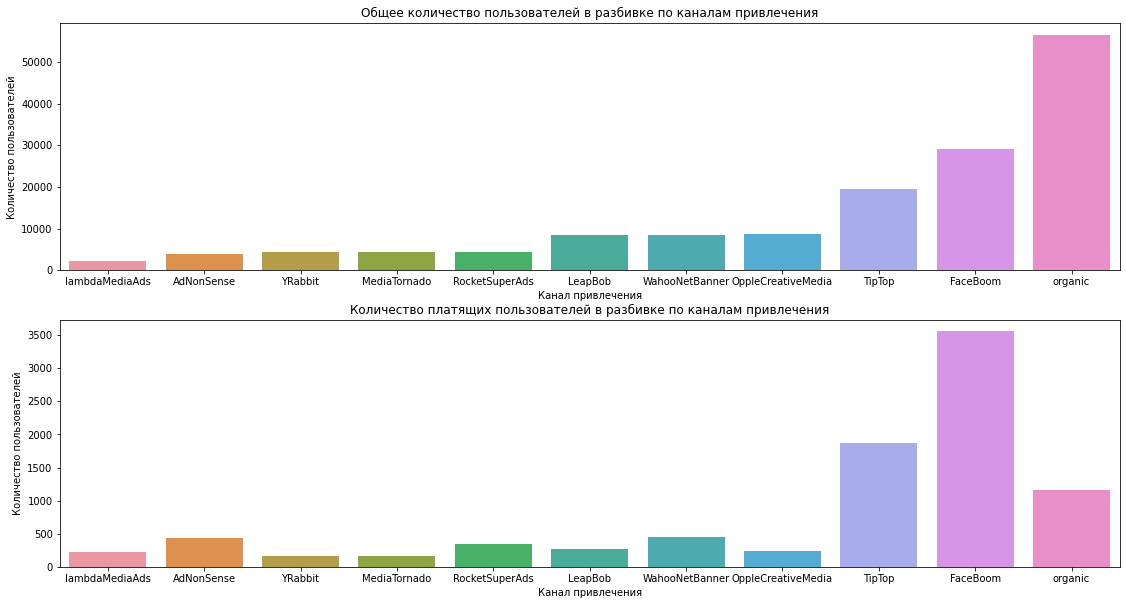

In [40]:
plt.figure(figsize=(19, 10))

channel_payers_diagram = sns.barplot(x='channel', y='n_users', data=channel_payers, ax=plt.subplot(2,1,1))
channel_payers_diagram.set_title('Общее количество пользователей в разбивке по каналам привлечения')
channel_payers_diagram.set_xlabel('Канал привлечения')
channel_payers_diagram.set_ylabel('Количество пользователей')

channel_payers_diagram = sns.barplot(x='channel', y='pay_users', data=channel_payers, ax=plt.subplot(2,1,2))
channel_payers_diagram.set_title('Количество платящих пользователей в разбивке по каналам привлечения')
channel_payers_diagram.set_xlabel('Канал привлечения')
channel_payers_diagram.set_ylabel('Количество пользователей')

plt.show()

In [41]:
for i in channel_payers.index:
    
    result_i = channel_payers.loc[i,'pay_users'] / channel_payers.loc[i,'n_users']
    channel_payers.loc[i, 'payers_part'] = '{:.2%}'.format(result_i)
    
channel_payers


,channel,n_users,pay_users,payers_part
0,lambdaMediaAds,2149,225,10.47%
1,AdNonSense,3880,440,11.34%
2,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
4,RocketSuperAds,4448,352,7.91%
5,LeapBob,8553,262,3.06%
6,WahooNetBanner,8553,453,5.30%
7,OppleCreativeMedia,8605,233,2.71%
8,TipTop,19561,1878,9.60%
9,FaceBoom,29144,3557,12.20%


Согласно полученному расчету, наибольшее число пользователей являются органическими, но в то же время, только 2% из них начинают совершать покупки, что требует дополнительно изучения, возможно, приложение имеет какие-либо недостатки в сравнении с конкурентами.

С точки зрения перехода пользователей в статус платящих, наиболее эффективными источниками являются FaceBoom (12,2%) и AdNonSense (11,34%). Но из первого источника было привлечено наибольшее количество пользователей, а из второго на 10000 пользователей вместе. Вторым источником по количеству привлеченных пользователей является TipTop, но процент перехода несколько меньше (9,6%), что делает его не настолько привлекательным.

Наиболее неэффективными источниками привлечения клиентов являются YRabbit, MediaTornado, с помощью которых удалось привлечь меньше всего пользователей (около 4300 для каждого источника), а также уровень совершения покупок пользователями достаточно низкий (3- 3,6%). Источники LeapBob, OppleCreativeMedia помоги привлечь большее число пользователей, чем предыдущие два (около 8500 пользователей), но процент перехода остается также низким (2,7 - 3%), что также говорит о их неэффективности.


**Промежуточный вывод**

На текущем этапе исследования было определено, что приложение наиболее популярно для жителей United States, которые так же наиболее активно совершают в нем покупки (6,9%), наименьшая активность наблюдается среди жителей France, откуда было зарегистрировано наименьшее количество пользователей с нименьшим процентом перехода в статус платящих (3,8%). Возможно, популярность исследуемого продукта в United States является основной причиной популярности приложения для пользователей техники Apple, в связи с чем продвижение приложение наиболее переспективно для пользователей iPhone, а так же пользователей Мас, среди которых наблюдался весомый процент перехода в платящие.
Предварительно, наиболее эффективными рекламными источниками были определены FaceBoom (12,2%) и AdNonSense (11%) с точки зрения количества привлеченных пользователей и их активного совершения покупок. Также была выявлен крайне низкий процент перехода в статус платящих среди органических пользователей (2%), несмотря на то, что данная категория пользователей наиболее общирная. Данный факт требует дополнительного анализа с целью выявления причин. 

## Маркетинг

Определим общую сумму расходов на меркетинг.

In [42]:
total_costs = costs['costs'].sum()

print('$', round(total_costs, 2))

$ 105497.3


Определим как ранные расходы распределены по рекламным источникам.

In [43]:
channels_costs = (costs
                 .pivot_table(index='channel', values='costs', aggfunc='sum')
                 .sort_values(by='costs', ascending=False)
                 )
channels_costs

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Согласно полученному расчету, половина рекламного бюджета была потрачене на рекламу в TipTop (54751,3). В то же время, ранее выло выявлено, что данный источник не является наиболее эффективным, поскольку через него было привлечено заметно меньше пользователей, которые так же не являлись наиболее активными плательщиками. Рекламные расходы на FaceBoom значительно ниже (32445,6), но учитывая полученные ранее данные данный источник являлся наиболее эффективным и привлек наибольшее количество пользователей, более 10% которых совершили покупки в приложении.

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.
Для этого добавим в датафрейм столбец с номером каждой недели, а так же столбец с номером месяца, который пригодится при дальнейшем исследовании.

In [44]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


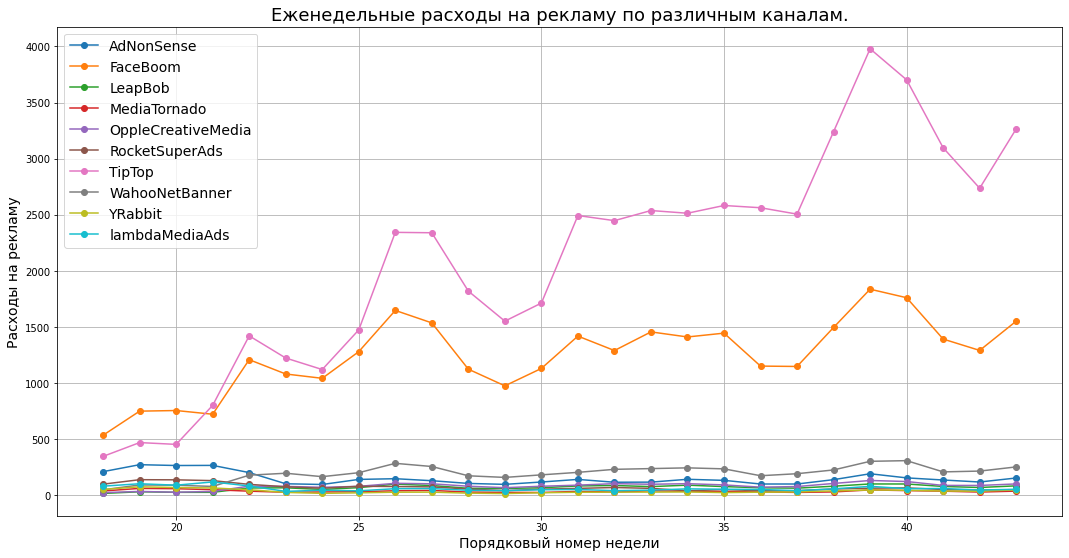

In [45]:
fig, ax = plt.subplots()

channels = []

for channel, weeks in costs.groupby('channel'):
    (weeks.query('channel == @channel').
     pivot_table(index='week', values='costs', aggfunc='sum').
     plot(ax=ax, style='o-', figsize=(18,9), grid=True, label=channel)
    )
    channels.append(channel)

plt.legend(channels, fontsize=14)
plt.title('Еженедельные расходы на рекламу по различным каналам.', fontsize=18)
plt.xlabel('Порядковый номер недели', fontsize=14)
plt.ylabel('Расходы на рекламу', fontsize=14)

plt.show()

Как видно из полученных графиков, лидерами по расходам являются каналы TipTop и FaceBoom, расходы на остальные каналы значительно ниже  и изменяются незначительно в пределах до $200 еженедельно.

По графикам лидеров расходов видно, что начиная с 18 и до 26 недели года расходы на рекламу значительно увеличивались еженедельно, в частности по каналу TipTop расходы за это время увеличились в 5 раз. Далее с 27 по 30 неделю наблюдался спад и с 31 по 37 неделю расходы держались на одном уровне. После этого наблюдался заметный подъем расходов, которые достигли максимального значения на 39 неделе (около 4000 для канала TipTop), после чего вновь пошли на спад. Форма графиков для данных двух каналов-лидеров схожа.

Визуализируем динамику изменения расходов во времени по месяцам по каждому источнику. Столбец с порядковыми намерами месяцев уже был добавлен ранее.

Text(0, 0.5, 'Суммарные расходы на рекламу')

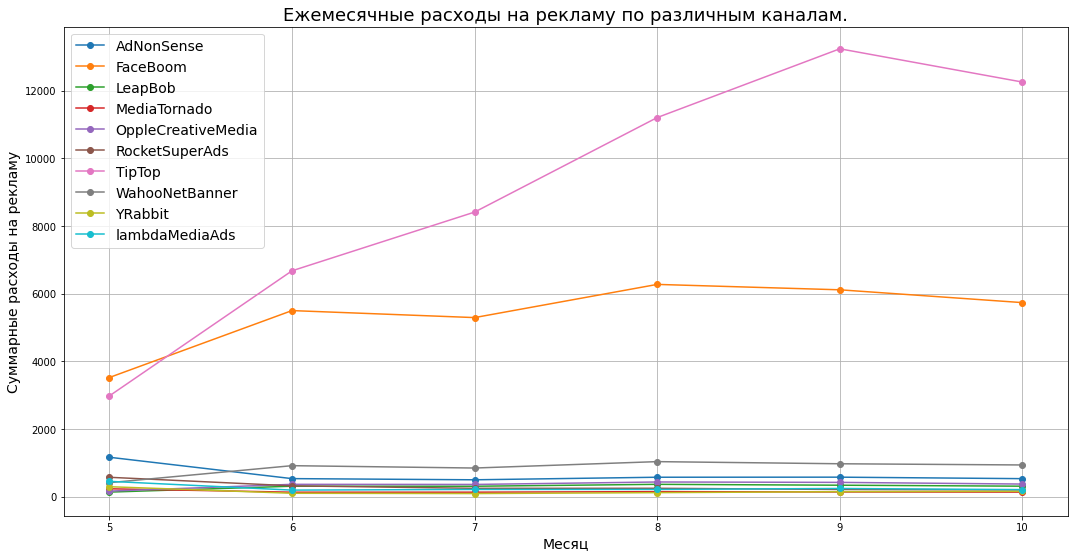

In [46]:
fig, ax = plt.subplots()

channels = []

for channel, months in costs.groupby('channel'):
    (months.
     pivot_table(index='month', values='costs', aggfunc='sum').
     plot(ax=ax, style='o-', figsize=(18,9), grid=True, label=channel)
    )
    channels.append(channel)

plt.legend(channels, fontsize=14)
plt.title('Ежемесячные расходы на рекламу по различным каналам.', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Суммарные расходы на рекламу', fontsize=14)

Как видно из полученных графиков, лидерами по расходам так же являются каналы TipTop и FaceBoom. Для первого надлюдался плавный рост расходов с мая по сентябрь (с 3000 до 13000 ежемесячно), в октябре произошел незначительный спад. Рекламный канал FaceBoom в разраза по месяцам рос незначительно, с июня по октябрь расходы на рекламу в данном канале составляли около 6000 ежемесячно.

Определим сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. А также визуализируем данную информацию.

In [47]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


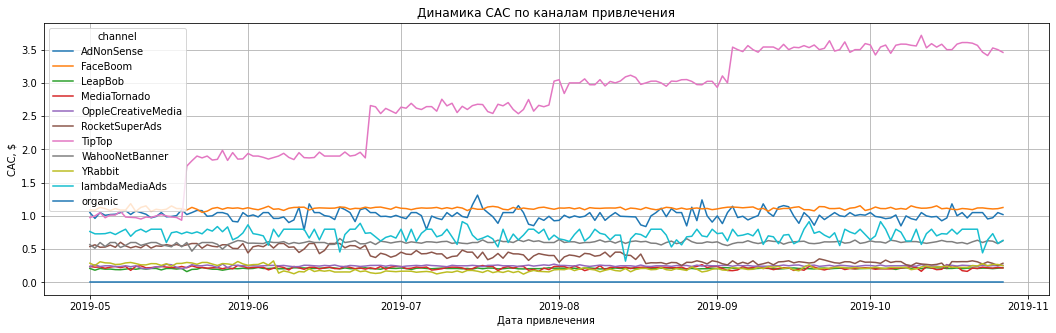

In [48]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(18, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Для большинства каналов стоимость привлечения оставалась примерно на одном уровне на протяжении всего исследуемого промежутка времени.
Исключением является канал TipTop, стоимость привлечения клиентов в котором росла ежемесячно, что прослеживается в резких увеличениях значений на графике. Этот показатель является дополнительным аргументом, что данный канал неэффективен для рекламы приложения.
Также необходимо выделить канал RocketSuperAds как единственный канал, для которого стоимость привлечения клиентов падала с мая по октябрь, что может говорить о его эффективности.

In [49]:
add_users = profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum'])
add_users.columns = ['n_users',
                    'n_payers']

add_users['payers_part'] = add_users['n_payers'] / add_users['n_users']

add_users = add_users.sort_values(by='n_payers', ascending=False)

add_users

,n_users,n_payers,payers_part
channel,,,
FaceBoom,29144,3557,0.122049
TipTop,19561,1878,0.096007
organic,56439,1160,0.020553
WahooNetBanner,8553,453,0.052964
AdNonSense,3880,440,0.113402
RocketSuperAds,4448,352,0.079137
LeapBob,8553,262,0.030633
OppleCreativeMedia,8605,233,0.027077
lambdaMediaAds,2149,225,0.104700


**Промежуточный вывод**

В данном разделе проекта был проведен анализ расходов на маркетинг. Было выявлено, что исследуемый период времени 
половина рекламного бюджета была потрачене на рекламу в TipTop (54751,3). Рекламные расходы на FaceBoom значительно ниже (32445,6), но учитывая полученные в предыдущем разделе данные данный источник являлся наиболее эффективным и привлек наибольшее количество пользователей, более 10% которых совершили покупки в приложении. При рассмотрении еженедельного и ежемесячного распределения рекламного бюджета, было обнаружено, что данные каналы не только составляют наибольшую часть в расходах на продвижение, но и значительно увеличивают их. Данная тенденция наиболее заметна для канала TipTop, для которого рост расходов с мая по сентябрь составил с 3000 до 13000 ежемесячно. При этом стоимость привлечения клиентов в данном канале росла ежемесячно и в целом увеличилась с $1  до  $3,5 с мая по октябрь. Учитывая информацию, полученную в предыдущем разделе о количестве привлеченных клиентов и проценте их перехода в статус платящих, можно поставить по сомнение эффективность данного канала продвижения.

## Окупаемость рекламы

Зададим дату проведения исследования 1 ноября 2019 года и горизонт проведения исследования равный 14 дням в соответствии с требованиями по окупаемости пользователей в соответствии с бизнес-планом.

In [50]:
observation_date = datetime(2019, 11, 1).date()
analysis_horizon = 14

Удалим из созданного ранее датафрейма `profiles` данные о пользователях, привлеченных органически, поскольку в ходе рекламной кампании на них не были потрачены средства рекламного бюджета. Наличие этих данных будет искажать расчет стоимости привлечения каждого клиента и окупаемости рекламы.

In [51]:
profiles = profiles.query('channel != "organic"').reset_index(drop = True)

profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
3,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
4,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
93564,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
93565,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
93566,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
93567,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


In [52]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

Проанализируем **окупаемость рекламы** c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI без разбивок, по всему массиву данных.

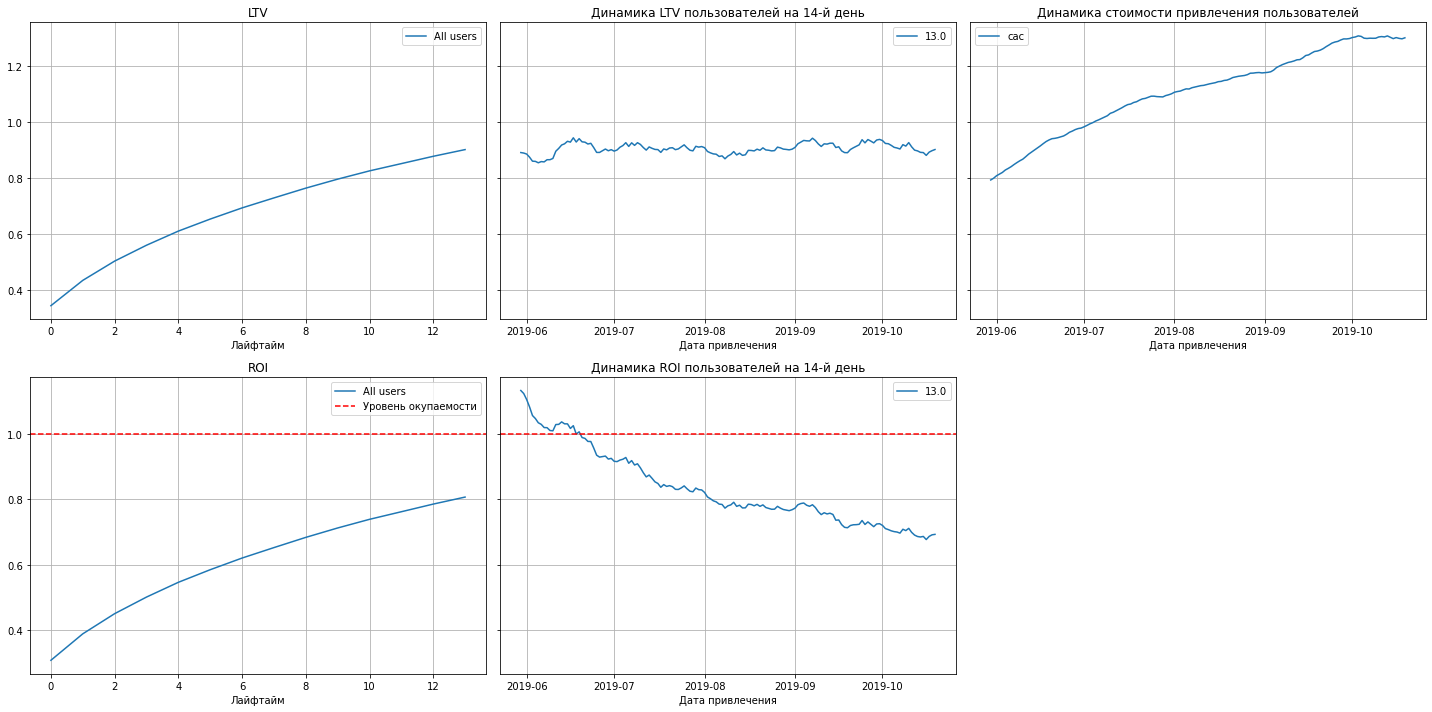

In [53]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=30)

Согласно полученным графикам можно сделать вывод:
- в соответствии с графиком ROI реклама не окупается. К концу заложенного периода времени (14 дней), требуемого для окупаемости, ROI незначительно превышает 0,8, что говорит о значительной степери неокупаемости. Это значит что компания терпит убытки, и не зарабатывает на привлечении клиентов.
- САС стабильно растет. Скорее всего это связано с постоянным увеличением рекламных бюджетов для некоторых рекламных источников (TipTop, FaceBoom), а так же их неэффективностью, в связи с чем компания не окупает расходы на рекламу.
- Динамика LTV достаточно стабильна, значит "качество" клиентов с течением времени не изменяется, они стабильно проживают одинаковое время с компанией.
- Динамика ROI стабильно падает с июня по октябрь, что говорит о стабильном снижении окупаемости рекламных компаний. Это в первую очередь связано с постоянным значительным увеличением расходов на неэффективные рекламные источники.

Проверим **удержание пользователей** и ее динамику. Для этого построим соответствующие графики.

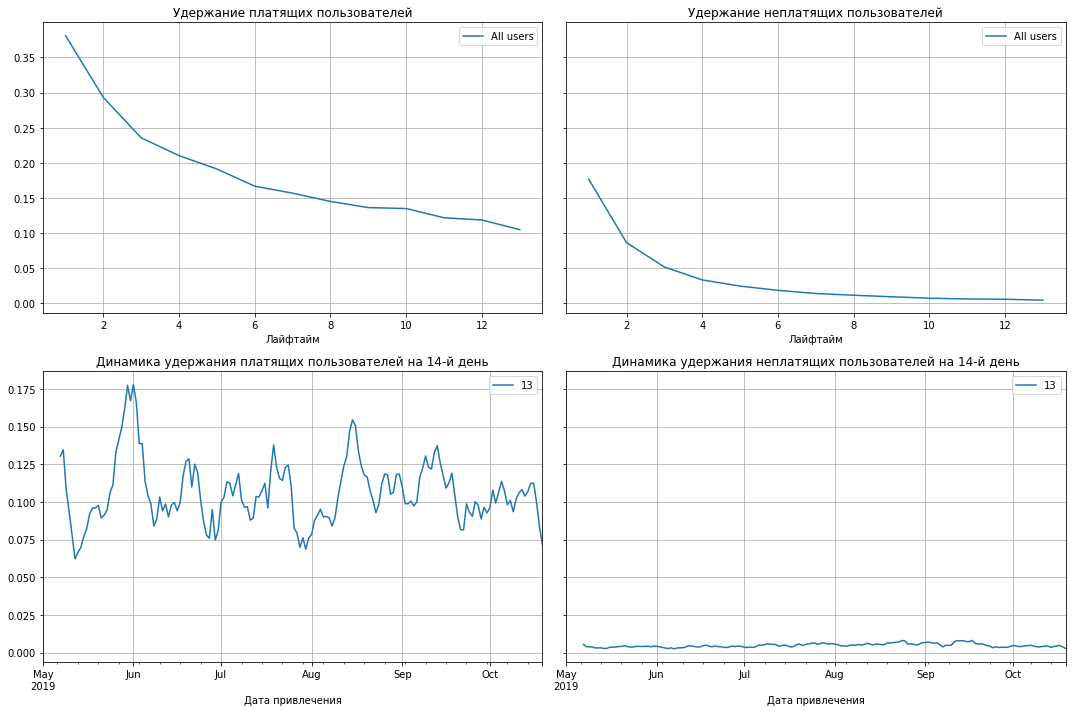

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Согласно полученным графикам удержание платящих пользователей заметно выше, чем неплатящих. Данный признак соответствует стандартным характеристикам. Динамика ударжания неплатящих пользователей стабильно низкая, не имеет каких-либо временных признаков на всем переоде онализа. Динамика ударжания платящих пользователей более нестабильна, в том числе просматривается тенденция к снижению данного показателя (уровень удержания на 14 день в мае составлял около 0,2, а в ноябре - 0,075, что говорит о значительно снижении удержания).

Проверим **конверсию пользователей** и ее динамику. Для этого построим соответствующие графики.

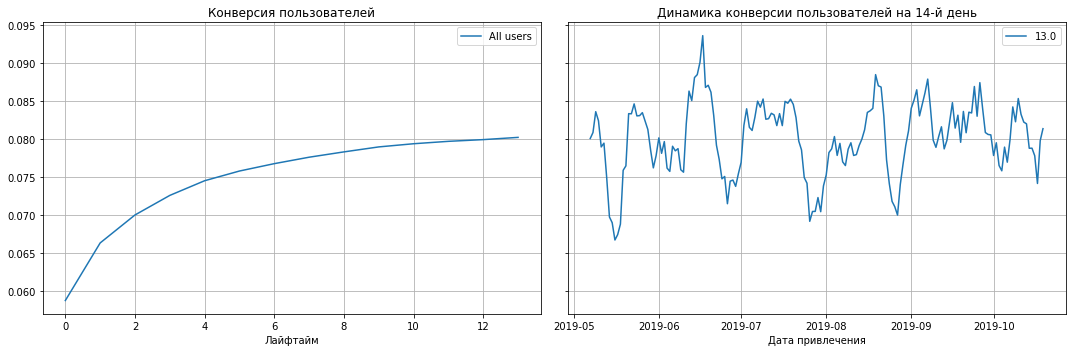

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

В соответствии с графиками конверсии, имеются позитивные тенденции. К 14-му дню около 8% пользователей переходит в статус платящих, а также график динамики конверсии показывает некоторое улучшение. Так с мая по сентябрь конверсия пользователей зачастую составляла менее 8%, а после сентября чеще всего находилась выше 8%. Это в целом говорит о том, что пользователи начинают более охотно совершать покупки в приложении.

**Проанализируем окупаемость рекламы с разбивкой по устройствам.** Для этого построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [56]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device']
)

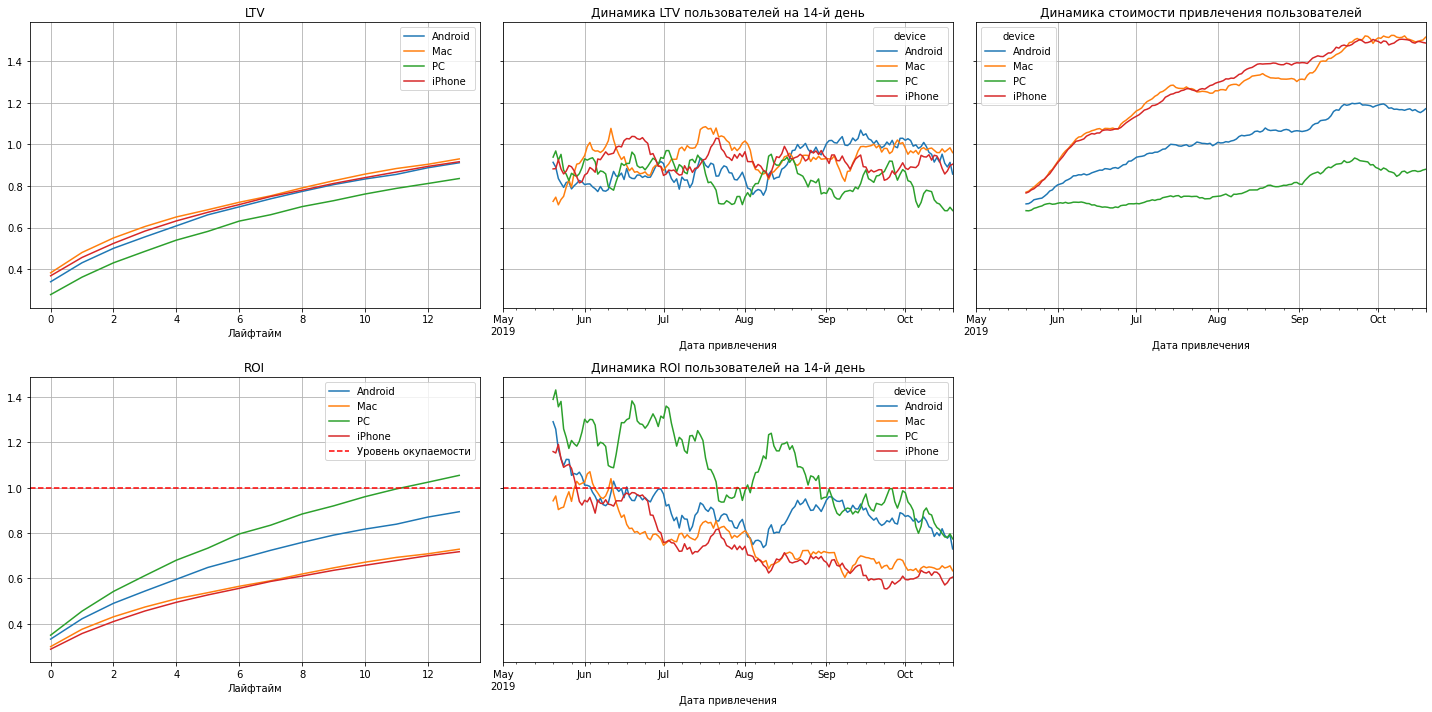

In [57]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=20)

Согласно полученным графикам можно сделать вывод:

- в соответствии с графиками ROI реклама для пользователей РС окупается на 11 день, для пользователей Android, Мас и iPhone не окупается за весь период времени. Соответственно компания зарабатывает только на клинтах, использующих РС, а как было выяснено ранее в проекте, данные категории пользователей не являются основными и составляют наименьший процент пользователей.
- САС стабильно растет для всех категорий пользователей. Но стоимость привлечения клиентов, использующих Мас и iPhone наиболее высокая, с чем и связана их низкая окупаемость. Самый низкий САС наблюдается для клинтов РС, размер которого позволяет данным пользователям окупаться.  
- Динамика LTV достаточно стабильна для всех категорий, кроме пользователей РС, для которых наблюдается снижение данного показателя к концу периода, т.е. к концу периода они проживают меньшее время с компанией.
- Динамика ROI стабильно падает с июня по октябрь для всех категорий пользователей. До июня все категории крома Мас были окупаемыми, далее все, кроме пользователей РС стали неокупаемым. После сентября график РС так же опустился ниже границы окупаемости. 

Проанализируем **окупаемость рекламы с разбивкой по странам**. Для этого построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [58]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region']
)

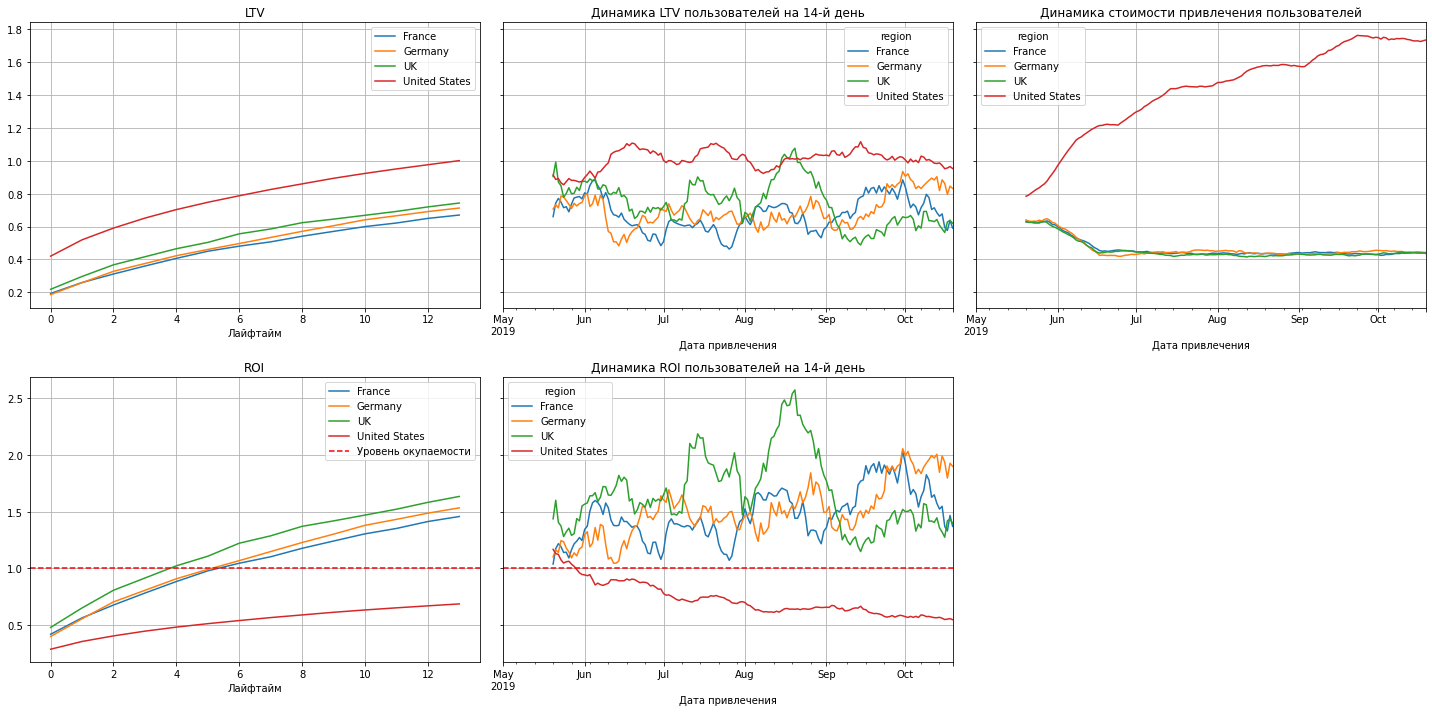

In [59]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=20)

Согласно полученным графикам можно сделать вывод:

- в соответствии с графиками ROI, единственными неокупаемыми пользователями являются клиенты из United States. Их окупаемость значительно ниже 1. Клиенты из других стран окупаются с 4 по 6 день, самые быстрые - клиенты из UK. Соответственно компания успешно зарабатывает на всех клинтах, кроме жителей United States.
- САС стабильно растет для пользователей из United States, рост значительный, скорее всего стоимость рекламы растет именно для этого региона, поскольку для всех остальных регионов САС значительно снизился в июне, после чего оставался стабилен до конца исследуемого периода.    
- Динамика LTV имеет некоторую положительную динамику для жителей United States и Germany, и отрицательную для France и UK. Но данные изменения не имеют критичной величины. 
- Динамика ROI положительна для клиентов Germany, France. Germany имеет тенденцию роста, France имеет некоторую тенденцию к снижению в конце периода. ROI для UK имеет достаточно нестабильные показатели, сещественно изменяющиеся с течением времени. Пользователи из United States не окупаются с июня, о чем говорит резко падающий график для этого региона. 

Проанализируем **окупаемость рекламы с разбивкой по рекламным каналам**. Для этого построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)

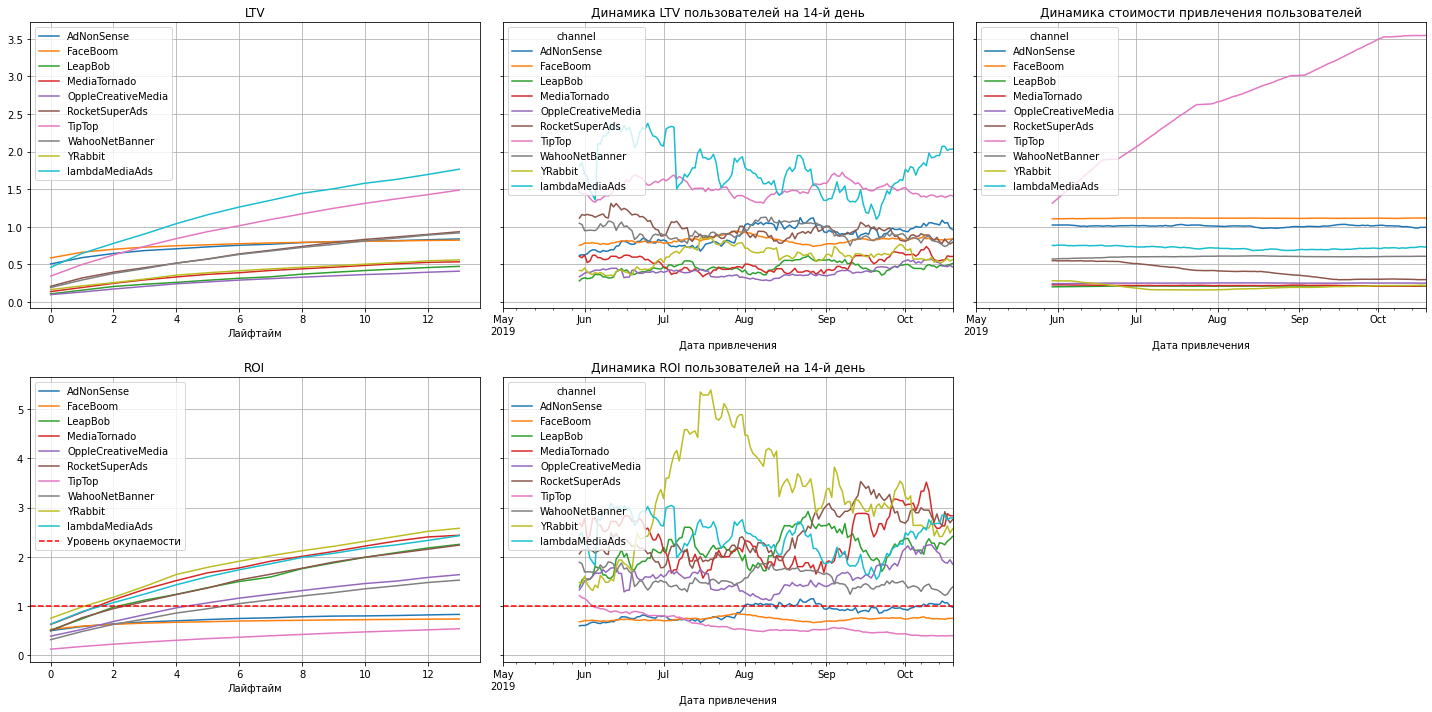

In [61]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=30)

Согласно полученным графикам можно сделать вывод:

- В соответствии с графиками ROI, каналы, которые не окупаются: TipTop, FaceBoom, LeapBob. Наихудшие показатели у канала TipTop. Примечательно, что на данный канал приходится половина рекламного бюджета, что говорит о крайне неэффективной стратегии расходования бюджета на маркетинг. Остальные рекламные каналы окупаются в период с 1 по 6 день. Наилучшие Показатели у канала YRabbit, но в соответствии с расчетами ранее он принес компании наименьшее количество клиентов, возможно поскольку не рассматривался маркетологами как перспективный. 
- САС стабильно растет для канала TipTop, поскольку как было рассчитано ранее, расходы по данному каналу значительно увеличивались ежемесячно, возможно в связи с увеличением стоимости рекламы или ошибочным выбором площадки, поскольку там не находится целевая аудитория. Единственный канал, показывающий снижение САС - RocketSupperAds, не являющийся основным в маркетинговой стратегии. Остальные каналы продемонстрировали стабильное сохранение уровна САС на протяжении исследуемого периода времени.  
- Динамика LTV достаточно стабильна для большинства каналов. Канал TipTop показывает долтаточно высокие показатели в течение всего периода. Наиболее нестабильные пользователи - пришедшие из LambdaMediaAds, которые с мая до середины сентября показывали стабильное снижение LTV, после чего снова перешли в рост. 
- Динамика ROI показывает, что TipTop, FaceBoom не окупаются на протяжении всего исследуемого периода времени. Канал AdNonSence с августа находится на границы окупаемости. Остальные каналы стабильно окупаются все время. С июля по сентябль канал YRabbit показывал наилучшие результаты в данном показателе. Возможно, были применены лучшие настройки рекламы, поскольку фактора сезонности не прослеживается в других источниках.

**Промежуточные выводы** и ответы на вопросы:
1. Реклама в целом не окупается. В ходе проведения исследования были определены категории которые окупаются и не окупаются, среди них были выявлены значительные различия.
2. Страна, оказывающая максимальное негативное влияние на общий уровень окупаемости - United States, устройства - iPhone, Мас и Android, рекламные каналы - TipTop и FaceBoom. Данные категории показали отсутствие окупаемости в течение всего периода времени. Учитывая, что пользователи, относящиеся к данным категориям, составляли значительную часть от общего числа пользователей, их влияние оказалось негативным на общую систуацию по компании и привело к общему снижению показателей и следовательно, к убыткам компании по данному приложению.
3. Данные проблемы могли быть вызваны неэффективным выбором стратегии. Возможно, стоимость рекламы в каналах TipTop и FaceBoom настолько высока, что в принципе превышает возможный заработок по приложению, кроме того стоимость рекламы в них регулярно значительно повышалась, что приводило к постоянному увеличению рекламных бюджетов. Неокупаемость клиентов из United States скорее всего связана с тем, что они и были привлечены через указанные ранее источники, стоимость рекламы в них и являлась основной проблемой. То же относится и к устройствам iPhone и Мас. Как было рассчитано ранее, процент перехода клиентов в статус платящих наиболее высокий для данных типов устройств, значит пользователи не сталкиваются с какими-либо припятствиями в ходе использования приложения. Следовательно, основной причиной отрицательного результата является несоизмеримо высокая стоимость привлечения данных клинтов.
4. Промежуточными рекомендациями для рекламного отдела стоит обозначить пересмотр основных рекламных каналов для продвижения. Основными каналами были выбраны наиболее невыгодные, что привело в снижению общих показателей по работе приложения. Все остальные каналы являются работоспособным инструментом. Например выявленный канал YRabbit показывает наиболее быструю окупаемость и наименьший уровень САС. При этом через него было привлечено наименьшее количество клиентов. Возможно, на него не были направлены значительные бюджеты, поскольку он не рассматривался как основной. В связи с этим, стоит протестировать увеличение бюджета по данному каналу, будет ли это способствовать увеличению количества привлекаемых клиентов. Также стоит обратить внимание на пользователей Android, поскольку они также являются потенциально эффективными клиентами.

##  Выводы по проекту.

В данном проекте был проведен анализ развлекательного приложения Procrastinate Pro+ с целью выявления причин неэффективности рекламных компаний и убытков в течение последних нескольких месяцев.
Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, включающие данные сервера о их посещениях, информация о их покупках за этот период, рекламные расходы, были загружены и приведены к единому стандартному виду в части наименований столбцов и требуемому типу данных для содержащейся в датафреймах информации. 

В ходе проведения **исследовательского анализа** было определено, что приложение наиболее популярно для жителей United States, которые так же наиболее активно совершают в нем покупки (6,9% от общего количества пользователей из этой страны перешли в категорию покупателей), наименьшая активность наблюдается среди жителей France, откуда было зарегистрировано наименьшее количество пользователей с наименьшим процентом перехода в статус платящих (3,8%). Наиболее часто приложение используется на мобильных устройствах, особенно на iPhone, а так же было определено, что пользователи Мас чаще всего переходят в категорию покупателей.

Предварительно с точки зрения количества привлеченных пользователей и их активного совершения покупок, наиболее эффективными рекламными источниками были определены FaceBoom (12,2%) и AdNonSense (11%). Также был выявлен крайне низкий процент перехода в статус платящих среди органических пользователей (2%), несмотря на то, что данная категория пользователей наиболее обширная. 

В ходе проведения **анализа маркетинговых показателей** был проведен анализ расходов на маркетинг, который выявил, что в исследуемый период времени половина рекламного бюджета была потрачена на рекламу в TipTop (54751,3). Рекламные расходы на FaceBoom значительно ниже (32445,6). При рассмотрении еженедельного и ежемесячного распределения рекламного бюджета, было обнаружено, что данные каналы не только составляют наибольшую часть в расходах на продвижение, но и значительно увеличивают их ежемесячно. Данная тенденция наиболее заметна для канала TipTop, для которого рост расходов с мая по сентябрь составил с 3000 до 13000 ежемесячно. При этом стоимость привлечения клиентов в данном канале также росла и в целом увеличилась с 1 до 3,5 с мая по октябрь. 

**В проведении оценки окупаемости рекламы были обозначены следующие тенденции:**
1.	Реклама в целом не окупается, рекламная стратегия предприятия требует существенной доработки.
2.	Страна, оказывающая максимальное негативное влияние на общий уровень окупаемости - United States, устройства - iPhone, Мас и Android, рекламные каналы - TipTop и FaceBoom. Данные категории показали отсутствие окупаемости в течение всего периода времени. Значительная доля пользователей из данных сегментов по отношению к общему числу пользователей привела к общему снижению показателей по приложению и, следовательно, к убыткам компании по данному направлению.
3.	Данные проблемы могли быть вызваны неэффективным выбором рекламных каналов. Возможно, стоимость рекламы в каналах TipTop и FaceBoom настолько высока, что превышает возможный заработок по приложению, кроме того стоимость рекламы в них регулярно значительно повышалась, что приводило к постоянному увеличению рекламных бюджетов. Неокупаемость клиентов из United States скорее всего связана с тем, что они и были привлечены через указанные ранее источники, стоимость рекламы в них и являлась основной проблемой. То же относится и к устройствам iPhone, Мас и Android. Данные категории показали средний или хороший процент перехода в категорию платящих, что говорит об отсутствии каких-либо проблем в работе приложения, но в то же время данный факт может говорить о слишком высокой цене рекламы.

**РЕКОМЕНДАЦИИ.**
1.	Рекламному отделу стоит пересмотреть рекламную стратегию в части продвижения:
- стоит сменить приоритеты в выборе основных каналов продвижения, поскольку выбранные ранее TipTop и FaceBoom не обладают эффективностью и убыточны. Например, рекламный канал YRabbit показывает наиболее быструю окупаемость и наименьший уровень САС, что может являться хорошим признаком для эффективного продвижения. Поскольку через него было привлечено наименьшее количество клиентов, а рекламный бюджет был одним из наименьших, можно предположить, что на него не были направлены значительные бюджеты, поскольку он не рассматривался как основной. В связи с этим, стоит протестировать увеличение бюджета по данному каналу, и оценить будет ли это способствовать увеличению количества привлекаемых клиентов.
- Также стоит обратить внимание на пользователей РС, поскольку они также являются потенциально эффективными клиентами. Они показывали наибольшую окупаемость, в связи с чем, необходимо определить из каких рекламных источников приходят данные клиенты, возможно именно они лучше всего реагируют на рекламу недооцененных каналов.

2. В целом по предприятию необходимо рассмотреть категорию органических пользователей. Приложение для них потенциально очень интересно, поскольку приток органических клиентов превышает все другие каналы, но в дальнейшем только 2% из них становятся платящими пользователями, что намного ниже остальных категорий, в связи с чем, данный вопрос требует более детальной проработки, поскольку данная категория является наиболее интересной и выгодной для предприятия. Возможно, такие пользователи не могут сразу оценить всю его привлекательность и выбирают конкурирующие варианты, в то время как пользователи, приходящие через рекламу, могут видеть важную для них информацию на рекламном баннере, в связи с чем, чаще принимают решения о покупках.
